## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = r"C:\Users\cchic\OneDrive\Documents\projects_challenges\Pharmaceutical_Analysis_Matplotlib\Mouse_metadata.csv"
study_results_path = r"C:\Users\cchic\OneDrive\Documents\projects_challenges\Pharmaceutical_Analysis_Matplotlib\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata.info()
#study_results.info()

# Combine the data into a single dataset
mousestudy_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

#mousestudy_df.info()



# Display the data table for preview
mousestudy_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = mousestudy_df.nunique()["Mouse ID"]
print(mouse_count)


249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mousestudy_df[mousestudy_df.duplicated(["Mouse ID", "Timepoint"])]
print(duplicate_mice)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mousestudy_df.loc[mousestudy_df["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mousestudy_df = mousestudy_df.drop(mousestudy_df[mousestudy_df["Mouse ID"]== 'g989'].index)
clean_mousestudy_df.info

<bound method DataFrame.info of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898 

In [6]:
# Checking the number of mice in the clean DataFrame.
cleanmouse_count = clean_mousestudy_df.nunique()["Mouse ID"]
print(cleanmouse_count)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summarystat_df = clean_mousestudy_df.groupby("Drug Regimen")

#summarystat_df.head()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_vol_mean = summarystat_df["Tumor Volume (mm3)"].mean()
tumor_vol_median = summarystat_df["Tumor Volume (mm3)"].median()
tumor_vol_std = summarystat_df["Tumor Volume (mm3)"].std()
tumor_vol_sem = summarystat_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
group_summarystats_df = pd.DataFrame({"Mean": tumor_vol_mean, "Median": tumor_vol_median, 
                                     "Standard Deviation": tumor_vol_std, 
                                     "SEM": tumor_vol_sem})

group_summarystats_df




,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
group_summarystats_df.agg



<bound method DataFrame.aggregate of                    Mean     Median  Standard Deviation       SEM
Drug Regimen                                                    
Capomulin     40.675741  41.557809            4.994774  0.329346
Ceftamin      52.591172  51.776157            6.268188  0.469821
Infubinol     52.884795  51.820584            6.567243  0.492236
Ketapril      55.235638  53.698743            8.279709  0.603860
Naftisol      54.331565  52.509285            8.134708  0.596466
Placebo       54.033581  52.288934            7.821003  0.581331
Propriva      52.320930  50.446266            6.622085  0.544332
Ramicane      40.216745  40.673236            4.846308  0.320955
Stelasyn      54.233149  52.431737            7.710419  0.573111
Zoniferol     53.236507  51.818479            6.966589  0.516398>

## Bar and Pie Charts

Text(0.5, 1.0, 'Timepoints per Drug Regimen')

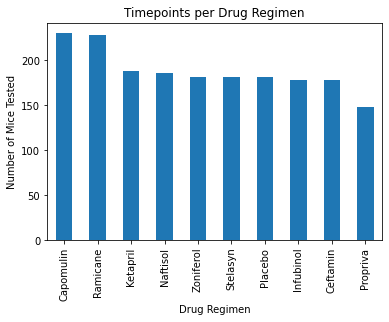

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandabar = clean_mousestudy_df["Drug Regimen"].value_counts().plot(kind="bar")

pandabar.set_xlabel("Drug Regimen")
pandabar.set_ylabel("Number of Mice Tested")
pandabar.set_title("Timepoints per Drug Regimen")


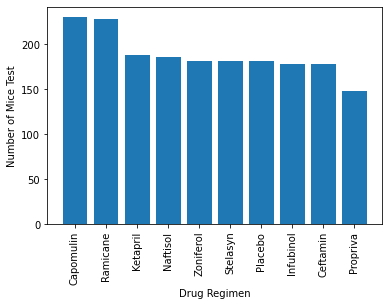

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = clean_mousestudy_df["Drug Regimen"].value_counts().index
y_axis = clean_mousestudy_df["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis)
plt.xticks(rotation= "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Test")
plt.show()

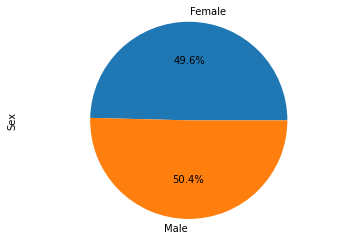

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_mousestudy_df.groupby("Sex").nunique()["Mouse ID"]
#print(sex_count)
gender_pandasdpie = sex_count.plot(kind="pie", y="sex", autopct='%1.1f%%')
gender_pandasdpie.set_ylabel("Sex")
plt.axis("equal")
plt.show()

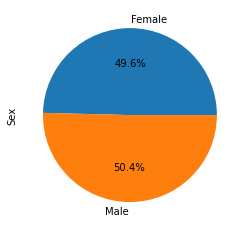

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_pyplot = clean_mousestudy_df.groupby('Sex').nunique()["Mouse ID"]
plt.pie(sex_pyplot, labels=sex_pyplot.index, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = pd.DataFrame(clean_mousestudy_df.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns={"Timepoint": "Last_Timepoint"})
timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_group_df = pd.merge(clean_mousestudy_df, timepoint_df, on="Mouse ID")
merge_group_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    drug_df = merge_group_df.loc[merge_group_df["Drug Regimen"] == treatment]
    
    
    # add subset 
    tuvolu_df = drug_df.loc[drug_df["Timepoint"]== drug_df["Last_Timepoint"]]
    volume = tuvolu_df['Tumor Volume (mm3)']
    tumor_data.append(volume)
    # Determine outliers using upper and lower bounds
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {treatment}: {iqr}')
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below lower bound for {treatment}: {lower_bound} could be outliers.")
    print(f"Values above upper bound for {treatment}: {upper_bound} could be outliers.")
    
    outliers = volume.loc[(tuvolu_df['Tumor Volume (mm3)'] < lower_bound) | (tuvolu_df['Tumor Volume (mm3)'] > upper_bound)]
    outliers
    

IQR for Capomulin: 7.781863460000004
Values below lower bound for Capomulin: 20.70456164999999 could be outliers.
Values above upper bound for Capomulin: 51.83201549 could be outliers.
IQR for Ramicane: 9.098536719999998
Values below lower bound for Ramicane: 17.912664470000003 could be outliers.
Values above upper bound for Ramicane: 54.30681135 could be outliers.
IQR for Infubinol: 11.477135160000003
Values below lower bound for Infubinol: 36.83290494999999 could be outliers.
Values above upper bound for Infubinol: 82.74144559000001 could be outliers.
IQR for Ceftamin: 15.577752179999997
Values below lower bound for Ceftamin: 25.355449580000002 could be outliers.
Values above upper bound for Ceftamin: 87.66645829999999 could be outliers.


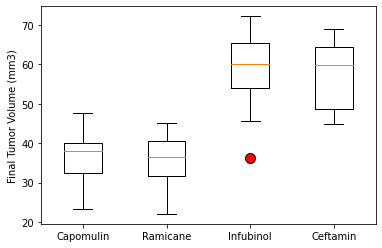

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker="o", markerfacecolor = "r", markersize = 10)

plt.boxplot(tumor_data, flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])



plt.show()


## Line and Scatter Plots

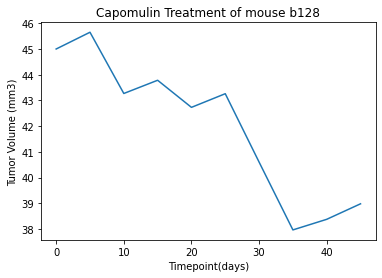

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capmouse = clean_mousestudy_df.loc[clean_mousestudy_df["Mouse ID"] == "b128"]
#print(capmouse)


plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of mouse b128")
plt.plot(capmouse["Timepoint"], capmouse["Tumor Volume (mm3)"])


Text(0, 0.5, 'Average Tumor Volume (mm3)')

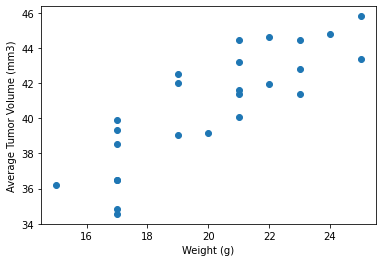

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df = clean_mousestudy_df.loc[clean_mousestudy_df["Drug Regimen"] == "Capomulin"]

avgtumor_df = pd.DataFrame(capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "Avg_Tumor_Vol"})
#avgtumor_df.head()

avgtumor_df = pd.merge(capomulin_df, avgtumor_df, on= "Mouse ID")
clnavgtumor_df = avgtumor_df[["Weight (g)", 'Avg_Tumor_Vol']].drop_duplicates()

x = clnavgtumor_df["Weight (g)"]
y = clnavgtumor_df["Avg_Tumor_Vol"]

plt.scatter(x,y)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")



## Correlation and Regression

The correlation between weight and average tumor volume of the Capomulin Regimen is 0.84.


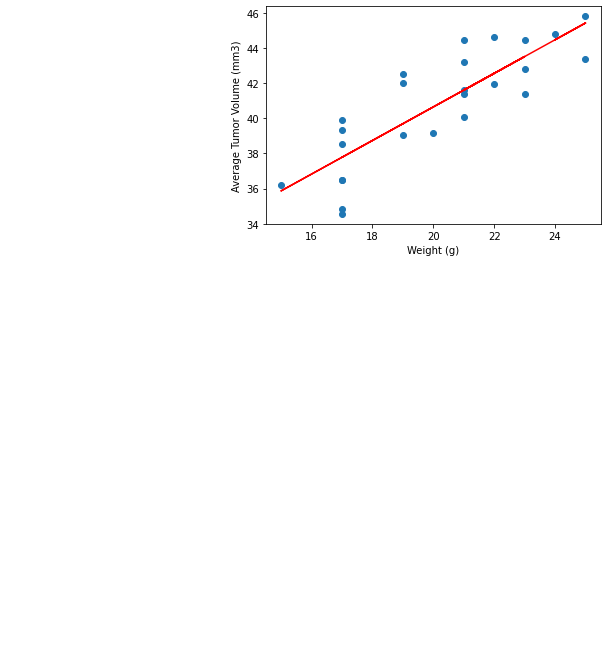

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = clean_mousestudy_df.loc[clean_mousestudy_df["Drug Regimen"] == "Capomulin"]

avgtumor_df = pd.DataFrame(capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index().rename(columns={"Tumor Volume (mm3)": "Avg_Tumor_Vol"})
#avgtumor_df.head()

avgtumor_df = pd.merge(capomulin_df, avgtumor_df, on= "Mouse ID")
clnavgtumor_df = avgtumor_df[["Weight (g)", 'Avg_Tumor_Vol']].drop_duplicates()

x = clnavgtumor_df["Weight (g)"]
y = clnavgtumor_df["Avg_Tumor_Vol"]

correlation = st.pearsonr(x,y)
#correlation
print(f"""The correlation between weight and average tumor volume of the Capomulin Regimen is {round(correlation[0],2)}.""")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
